## Aprendizado Não Supervisionado - Redução de Dimensionalidade
#### Prof. Thomas da Silva Paula

### UMAP - Demo 1

* Utilização do algoritmo UMAP em caso de uso com imagens.
* Base de dados MNIST, muito comum para exemplos

In [ ]:
!pip install umap-learn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import umap

from sklearn.datasets import load_digits

%matplotlib inline

### Carregar a base de dados e inspecionar algumas informações

In [2]:
digits = load_digits()
print(digits.data.shape)
print(digits.images.shape)
print(np.unique(digits.target, return_counts=True))

(1797, 64)
(1797, 8, 8)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))


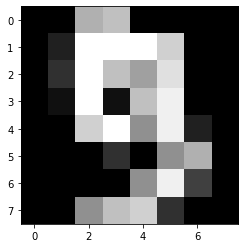

In [3]:
plt.gray()
plt.imshow(digits.images[9])

### Aplicar UMAP

In [4]:
digits_transformed = umap.UMAP(n_neighbors=5).fit_transform(digits.data)
print(digits_transformed.shape)

(1797, 2)


In [5]:
df = pd.DataFrame(digits_transformed, columns=['x', 'y'])
df['label'] = digits.target
df.head()

,x,y,label
0,19.639996,5.610449,0
1,12.012245,-1.736838,1
2,2.539497,16.549372,2
3,0.681163,8.337967,3
4,6.647087,-7.988279,4


### Plotar resultados

In [6]:
plt.rcParams['figure.figsize'] = (14, 8)

sns.set(font_scale=2)

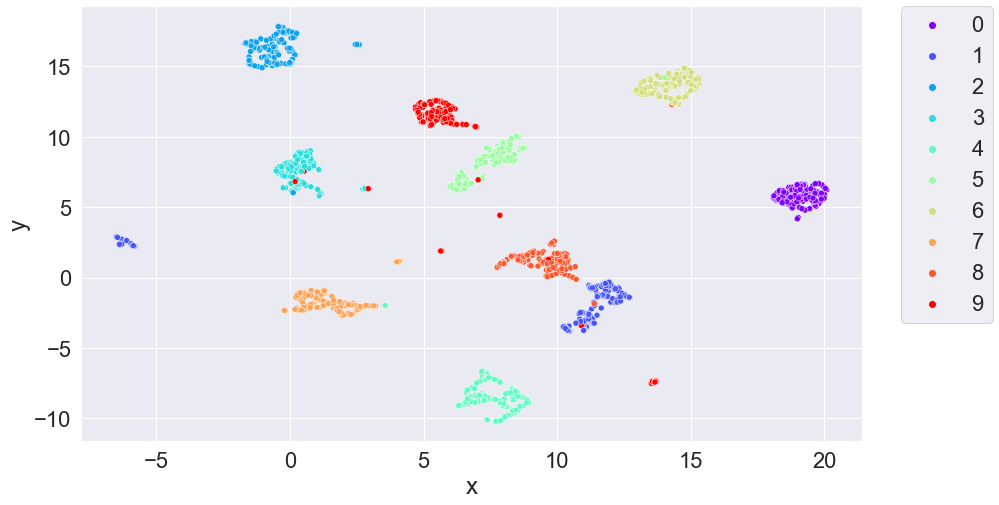

In [7]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend='full')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Testando hiperparâmetros

Variando n_neighbors

In [8]:
def run_umap_and_plot(n_neighbors, digits, min_dist=0.1):
    digits_transformed = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist).fit_transform(digits.data)
    
    df = pd.DataFrame(digits_transformed, columns=['x', 'y'])
    df['label'] = digits.target
    
    _ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend='full')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

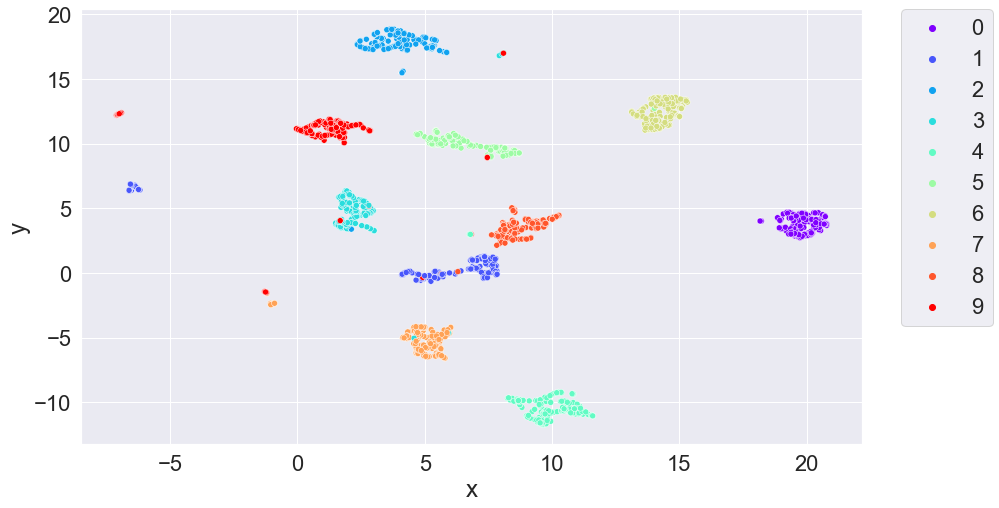

In [9]:
run_umap_and_plot(5, digits)

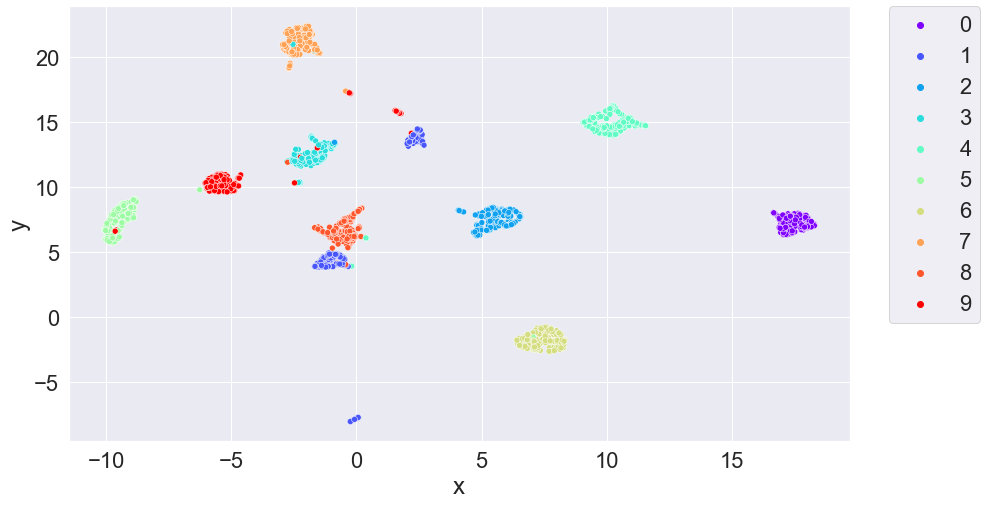

In [10]:
run_umap_and_plot(10, digits)

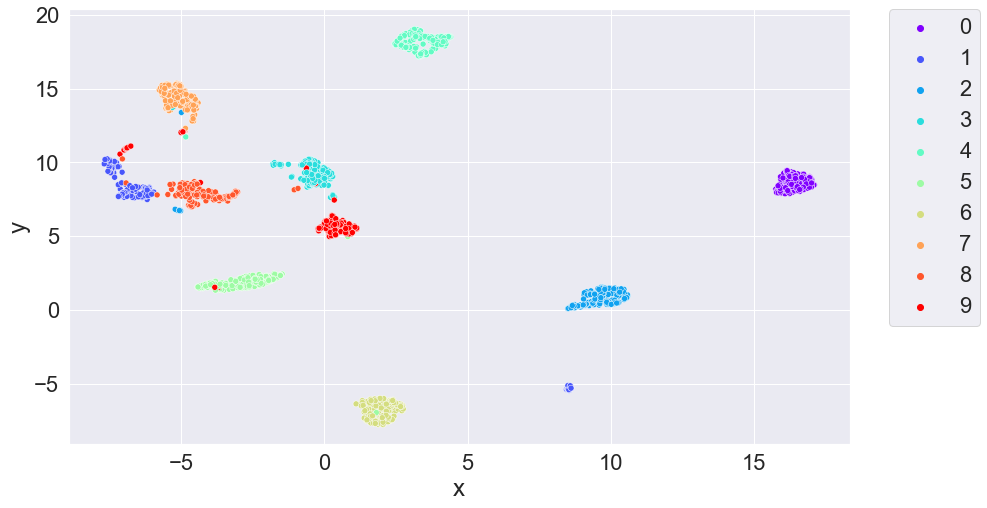

In [11]:
run_umap_and_plot(20, digits)

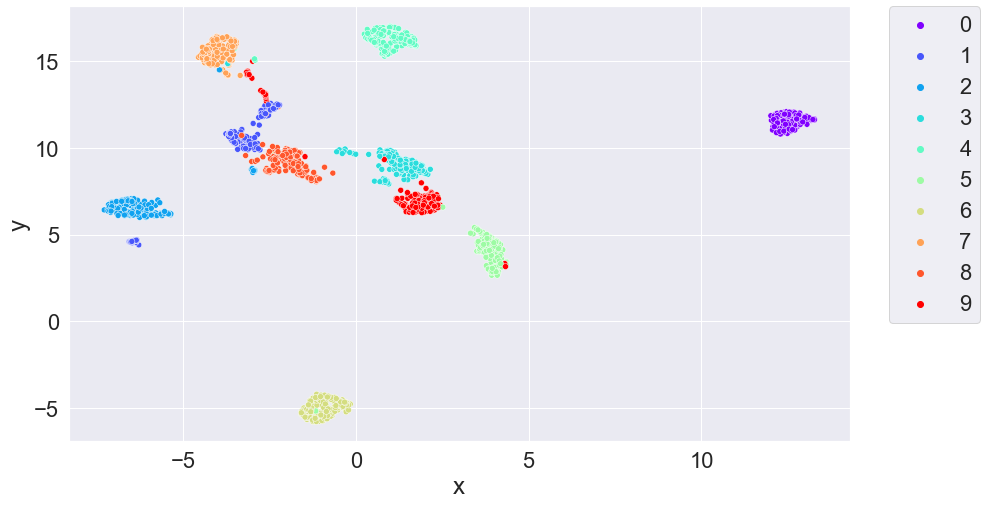

In [12]:
run_umap_and_plot(50, digits)

Variando min_dist

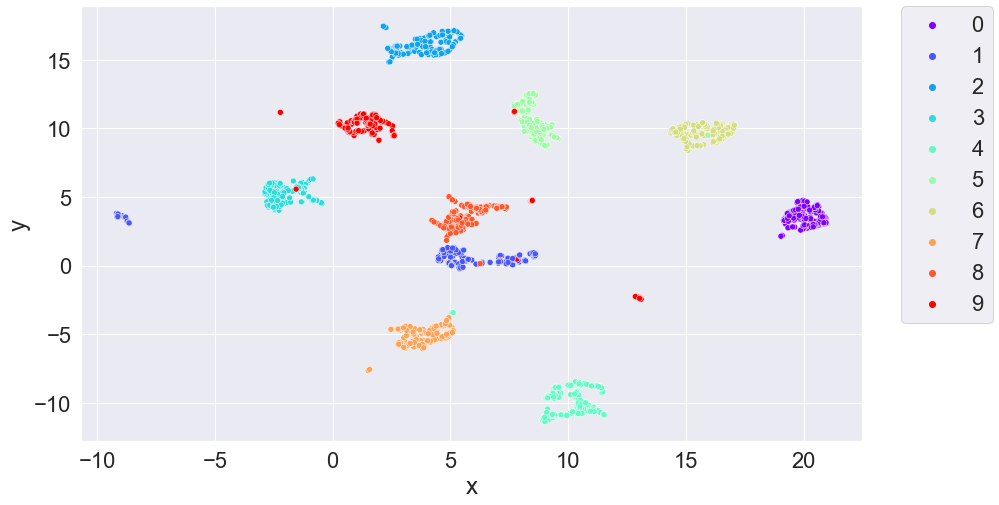

In [13]:
run_umap_and_plot(5, digits, min_dist=0.1)

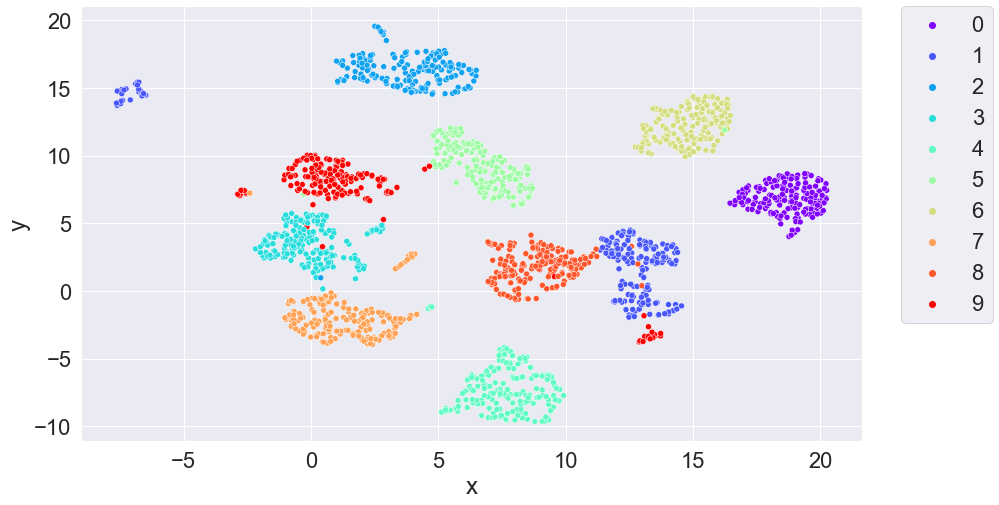

In [14]:
run_umap_and_plot(5, digits, min_dist=0.5)

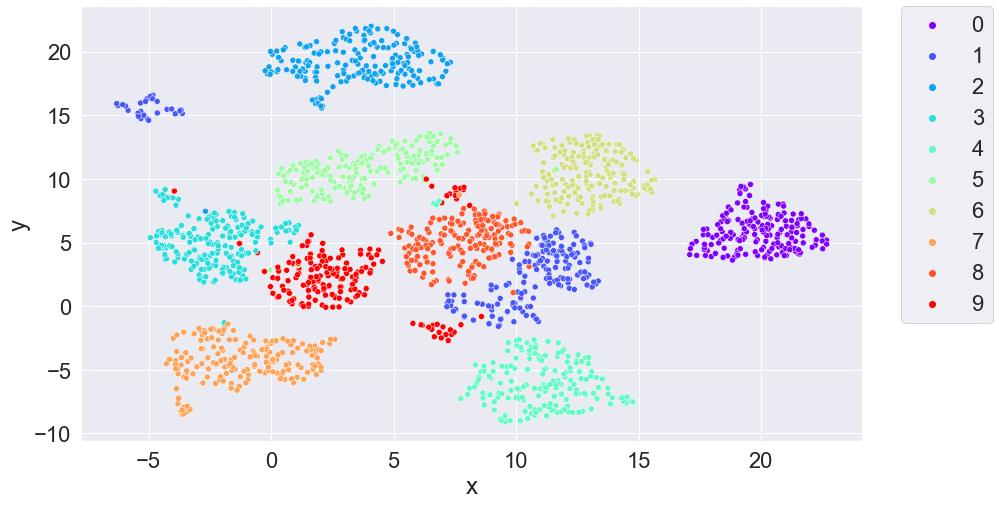

In [15]:
run_umap_and_plot(5, digits, min_dist=0.8)

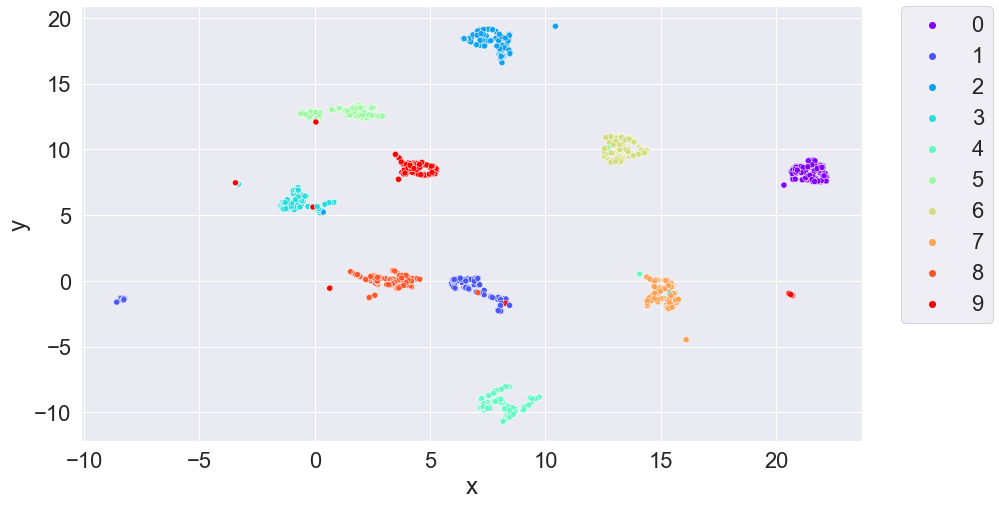

In [16]:
run_umap_and_plot(5, digits, min_dist=0.01)

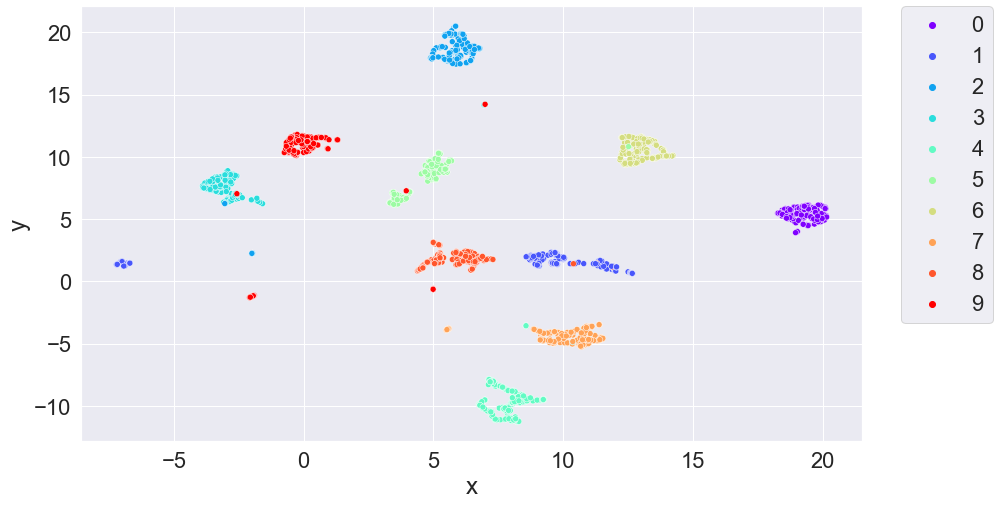

In [17]:
run_umap_and_plot(5, digits, min_dist=0.05)